In [1]:
from library import *
from model_DL import *
from functions import *
from metrics import *
from data_generator import *
from losses import *
from optimization import *
from parameters import *
import sys
import os

py_file_location = "..."
sys.path.append(os.path.abspath(py_file_location))


/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/yacibena84/.local/lib/python3.6/site-packages/tensorflow/python/frame

In [2]:
def gain_generator(d):
  s = np.random.normal(mu, sigma, Nbr)
  h = s/np.sqrt(1+(d)**pathloss_factor) 
  
  h = h**2 # h/N_var division by the same noise variance N_var
    
  return h

def gain_generator_2(d): # anne model
  """
      Channel gain model from reference [2].
      [2] Savard, Anne, and E. Veronica Belmega. "Optimal power allocation in a relay-aided cognitive network." Proceedings of the 12th EAI International Conference on Performance Evaluation Methodologies and Tools. 2019.
      
      Args:
         d: Distance between each nodes.
      Returns:
        Channel gain between each users and relay.
  """      
  return (1/d**(3/2))**2

GPR = gain_generator(Dpr_E)

GPR2 = gain_generator_2(Dpr_E)


In [3]:
GPR.shape

(2000000,)

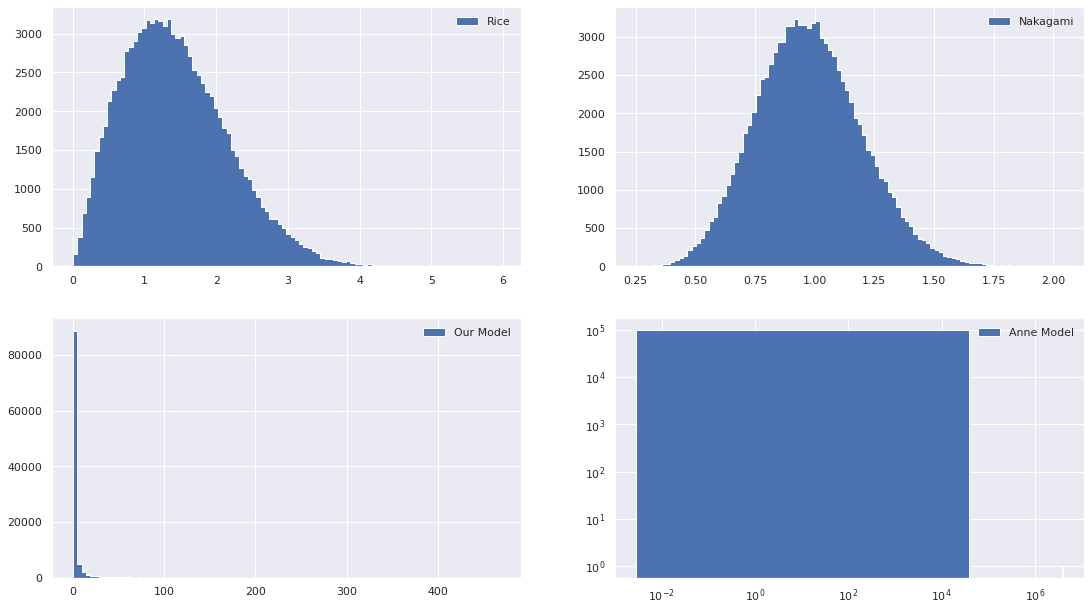

In [6]:
from scipy.stats import nakagami, rice
import matplotlib.pyplot as plt
nu = 4.97 
b = 0.775



r = rice.rvs(b, size=100000)
ngm = nakagami.rvs(nu, size=100000)


fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
plt.xscale('log')
plt.yscale('log')
ax[0][0].hist(r, bins =100, histtype='stepfilled', label='Rice')
ax[0][1].hist(ngm, bins =100, histtype='stepfilled', label='Nakagami')

ax[1][0].hist(GPR[:100000], bins =100,  histtype='stepfilled', label='Our Model')
ax[1][1].hist(GPR2[:100000], bins =100, histtype='stepfilled', label='Anne Model')

ax[0][0].legend(loc='best', frameon=False)

ax[0][1].legend(loc='best', frameon=False)
ax[1][0].legend(loc='best', frameon=False)
ax[1][1].legend(loc='best', frameon=False)

fig.savefig('distrubtion.png', dpi=100)

plt.show()



<AxesSubplot:ylabel='Count'>

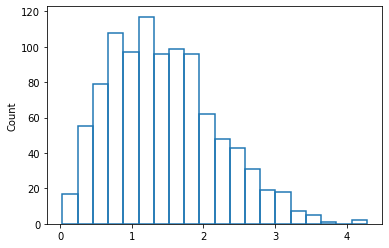

In [11]:
from seaborn import *
import seaborn as sns

sns.histplot(data=r, fill=False)
